In [5]:
import numpy as np
import cv2
from importlib import reload

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

import pickle

In [151]:
import utils
reload(utils)

<module 'utils' from 'C:\\Users\\Smit\\ds5230_2020_project\\utils.py'>

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
PICKLE_PATH = ".\\pickles\\"

In [9]:
test_images = utils.open_pickle(PICKLE_PATH + 'unsampled_image_names.pickle')

In [10]:
images, _ = utils.read_images('images', test_images, extension = 'jpg', shape = (80, 60, 3), verbose = 1)

Extracted 1000 images out of 28016
Extracted 2000 images out of 28016
Extracted 3000 images out of 28016
Extracted 4000 images out of 28016
Skipping 39403.jpg, no such file in directory images/
Extracted 5000 images out of 28016
Extracted 6000 images out of 28016
Extracted 7000 images out of 28016
Extracted 8000 images out of 28016
Extracted 9000 images out of 28016
Extracted 10000 images out of 28016
Skipping 39410.jpg, no such file in directory images/
Extracted 11000 images out of 28016
Extracted 12000 images out of 28016
Extracted 13000 images out of 28016
Extracted 14000 images out of 28016
Extracted 15000 images out of 28016
Extracted 16000 images out of 28016
Extracted 17000 images out of 28016
Extracted 18000 images out of 28016
Extracted 19000 images out of 28016
Extracted 20000 images out of 28016
Skipping 39401.jpg, no such file in directory images/
Extracted 21000 images out of 28016
Extracted 22000 images out of 28016
Skipping 39425.jpg, no such file in directory images/
E

## Recommendation using embedings

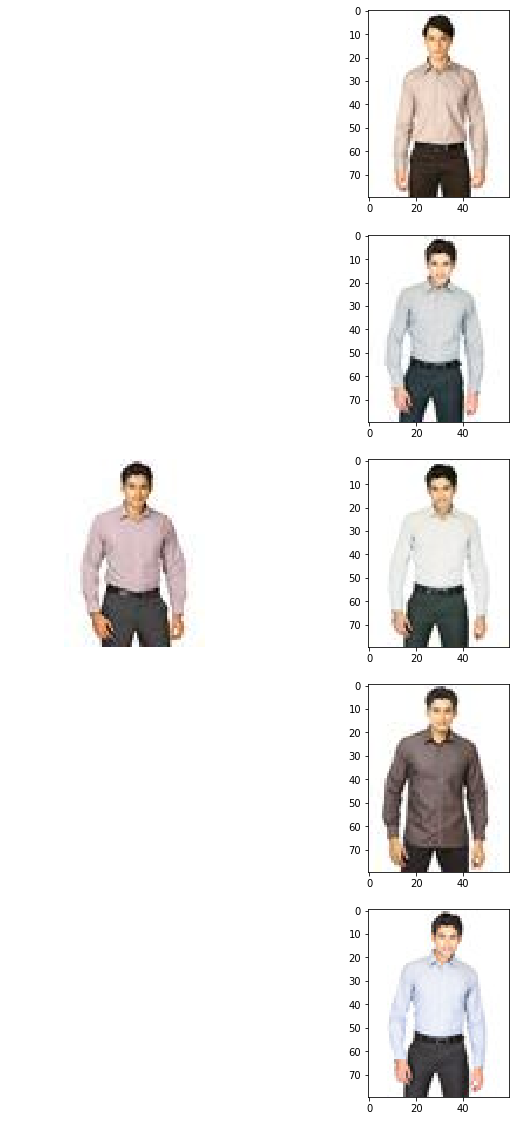

In [12]:
test_image = images[34]
top_5 = utils.recommend_images(test_image, 5, 'embeddings_sub')

fig, ax = plt.subplots(5, 2, figsize = (10, 20))
i = 0
for img in utils.read_images('images', top_5.astype(int), 'jpg')[0]:
    ax[i][1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i][0].axis('off')
    i += 1
    
ax[2][0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

For recommendation using embeddings transformation, euclidean distance metric works well and KMeans makes it faster

## Recommendation using PCA

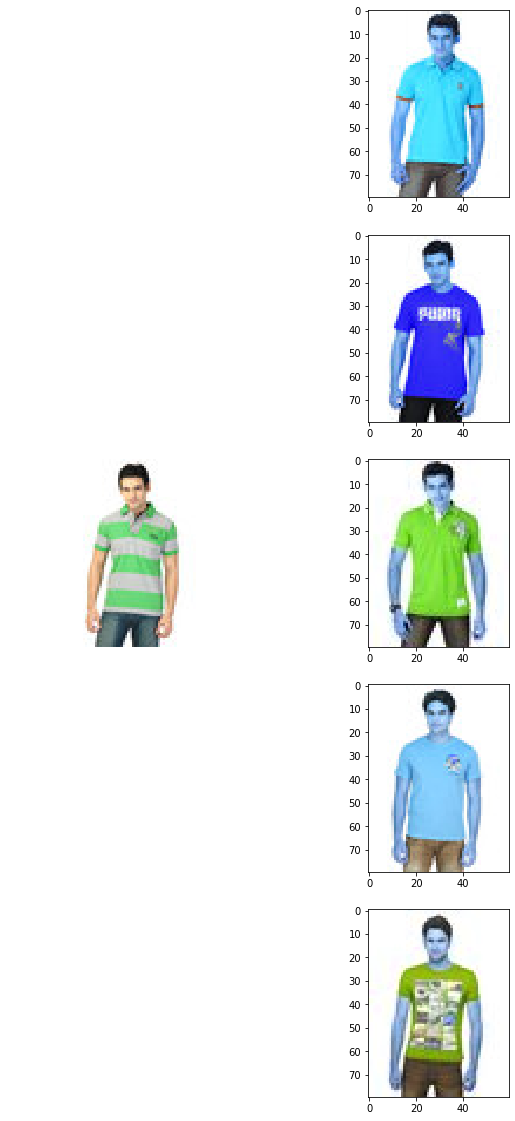

In [152]:
test_image = images[9080]
top = utils.recommend_images(test_image, n = 5, transformation = 'pca_1000', use_kmeans = False, metric = 'manhattan')
top_images, _ = utils.read_images('images', top, 'jpg')

fig, ax = plt.subplots(5, 2, figsize = (10, 20))

ax[:, 1] = utils.plot_images(top_images, ax = ax[:, 1])

np.vectorize(lambda x: x.axis('off'))(ax[:, 0])
ax[2][0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

plt.show()

For recommendation using PCA transformation, manhattan distance metric yeilds better results and KMeans does not work very well.